<a href="https://colab.research.google.com/github/ctruciosm/ACA124/blob/main/Gabarito_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pacotes necessários
install.packages("lpSolve")
install.packages("igraph")
library(lpSolve)
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Questão 1 (2.5 pontos)

Encontre a solução ótima do seguinte problema de programação linear: $$\textit{Min:} \quad Z = 3X_1 + 2X_2 + 4X_3,$$ sujeito às seguintes restrições 

- $2X_1 + X_2 + 3X_3 = 60,$
- $3X_1 + 3X_2 + 5X_3 \geq 120,$
- $X_1, X_2, X_2 \geq 0$

**Solução:**

In [17]:
C = c(3, 2, 4)  
A = matrix(c(2, 3, 1, 3, 3, 5), ncol = 3, nrow = 2)   
b = c(60, 120)

simplex = lp("min", C, A, c("=", ">="), b)
# A solução ótima é:
simplex$solution 
simplex


[1]  0 15 15

Success: the objective function is 90 

[1]  0 15 15

2,1,3
3,3,5


### Questão 2 (2.5 pontos)

A empresa _Baby Boomers_ possui três fábricas que produzem carrinhos de bebê que devem ser remetidos para quatro centros de distribuição. As fábricas 1, 2 e 3 tem capacidade para produzir 20, 30 e 18 remessas por mês, respectivamente. Cada centro de distribuição precisa receber 12 remessas por mês. A distância entre cada fábrica e os respectivos centros de distribuição é apresentado na Tabela abaixo.

| Fábrica / CD | CD1   | CD2    | CD 3   | CD 4   |
|:------------:|:-----:|:------:|:------:|:------:|
| $F_1$| 900km   | 1300km    | 500km   | 700km   |
| $F_2$| 1100km  | 1400km    | 600km   | 1000km   |
| $F_3$| 600km   | 1000km    | 800km   | 900km   |


O custo do frete por remessa é de R.100 mais 70 centavos por km. A _Baby Boomers_ está interessada em transportar as remessas de forma que o custo de transporte entre as fábricas e centros de distribuição seja mínimo. Escreva quantas remessas de cada fábrica devem ser enviadas a cada centro de distribuição e qual será o custo final do frete para tender as demandas da _Baby Boomers_. 

**Solução:**



In [11]:
matriz_distancias = matrix(c(900, 1100, 600, 1300, 1400, 1000, 500, 600, 800, 700, 1000, 900), ncol = 4)
matriz_custos = 100 + 0.7*matriz_distancias
matriz_custos

730,1010,450,590
870,1080,520,800
520,800,660,730


In [13]:
parte_abaixo_sinal = rep("=", 4)
parte_abaixo_valores = c(12, 12, 12, 12)

lado_direito_sinal = rep("<=", 3)
lado_direito_valores = c(20, 30, 18)

resultados_prob_transporte = lp.transport(matriz_custos, "min", 
row.signs = lado_direito_sinal, row.rhs = lado_direito_valores, 
col.signs = parte_abaixo_sinal, col.rhs = parte_abaixo_valores)


resultados_prob_transporte$solution

resultados_prob_transporte

6,0,2,12
0,0,10,0
6,12,0,0


Success: the objective function is 30280 

- Da F1 enviamos 6 remessas para o CD1.
- Da F3 enviamos 6 remessas para o CD1.
- Da F3 enviamos 12 remessas para o CD2.
- Da F1 enviamos 2 remessas para o CD3.
- Da F2 enviamos 10 remessas para o CD3.
- Da F1 enviamos 12 remessas para o CD4.

O custo total é R$30280




### Questão 3 (2.5 pontos)

A marca de computadores “Dell” possui fábricas em Recife e Manaus, sendo seus principais centros de distribuição em São Paulo e Rio de Janeiro. Com a crescente demanda de computadores, a empresa deseja enviar a maior quantidade possível de lotes para os centros de distribuição mas, devido a limitações logísticas, as rotas de envio possuem algumas limitações quanto à capacidade máxima de lotes que podem ser transportados. O gráfico abaixo apresenta as capacidades máximas das rotas.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/questao3.png)


Se a Dell  precisa executar um plano rapidamente para enviar a maior quantidade de lotes de ambas as fábricas para ambos os centros de distribuição, qual seria sua sugestão? (Quantos lotes chegarão em São Paulo e quanto no Rio de Janeiro?)

**Solução:**

Primeiro criamos nós fantasma:

- "A" para "Recife" com capacidade de 27.
- "A" para "Manaus" com capacidade de 30.
- "Sao Paulo" para "B" com capacidade de 32.
- "Rio de Janeiro" para "B" com capacidade de 45.

From,To,capacity
<chr>,<chr>,<chr>
A,Recife,27
A,Manaus,30
Recife,Salvador,12
Recife,Brasília,15
Manaus,Brasília,20
Manaus,Cuiabá,10
Salvador,Brasília,5
Cuiabá,Brasília,5
Salvador,Campo Grande,15


IGRAPH 5ba38d9 DN-- 12 20 -- 
+ attr: name (v/c), capacity (e/c)
+ edges from 5ba38d9 (vertex names):
 [1] A             ->Recife         A             ->Manaus        
 [3] Recife        ->Salvador       Recife        ->Brasília      
 [5] Manaus        ->Brasília       Manaus        ->Cuiabá        
 [7] Salvador      ->Brasília       Cuiabá        ->Brasília      
 [9] Salvador      ->Campo Grande   Brasília      ->Campo Grande  
[11] Brasília      ->Ribeirão Preto Brasília      ->Belo Horizonte
[13] Campo Grande  ->São Paulo      Campo Grande  ->Ribeirão Preto
[15] Belo Horizonte->Ribeirão Preto Belo Horizonte->Rio de Janeiro
+ ... omitted several edges

$value
[1] 52

$flow
 [1] 27 25 12 15 20  5  0  5 12  0 20 20  2 10 15  5  5 40  7 45

$cut
[1] 3 4 5 8

$partition1
+ 4/12 vertices, named, from 5ba38d9:
[1] A      Recife Manaus Cuiabá

$partition2
+ 8/12 vertices, named, from 5ba38d9:
[1] Salvador       Brasília       Campo Grande   Belo Horizonte Ribeirão Preto
[6] São Paulo      Rio de Janeiro B             

$stats
$stats$nopush
[1] 19

$stats$norelabel
[1] 6

$stats$nogap
[1] 2

$stats$nogapnodes
[1] 1

$stats$nobfs
[1] 1



[1] 52

[1] 27 25 12 15 20  5  0  5 12  0 20 20  2 10 15  5  5 40  7 45

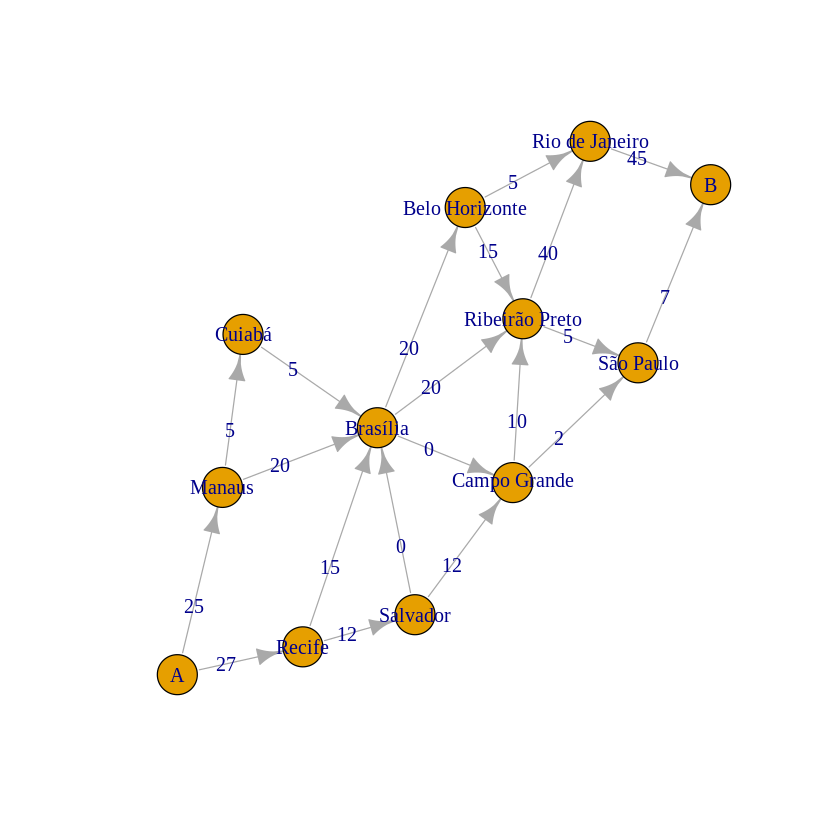

In [8]:
E = rbind(c("A", "Recife", 27), 
          c("A", "Manaus", 30), 
          c("Recife", "Salvador", 12), 
          c("Recife", "Brasília", 15), 
          c("Manaus", "Brasília", 20), 
          c("Manaus", "Cuiabá", 10), 
          c("Salvador", "Brasília", 5), 
          c("Cuiabá", "Brasília", 5), 
          c("Salvador", "Campo Grande", 15),
          c("Brasília", "Campo Grande", 18),
          c("Brasília", "Ribeirão Preto", 30), 
          c("Brasília", "Belo Horizonte", 20), 
          c("Campo Grande", "São Paulo", 2), 
          c("Campo Grande", "Ribeirão Preto", 15), 
          c("Belo Horizonte", "Ribeirão Preto", 20),
          c("Belo Horizonte", "Rio de Janeiro", 5),
          c("Ribeirão Preto", "São Paulo", 30), 
          c("Ribeirão Preto", "Rio de Janeiro", 40), 
          c("São Paulo", "B", 32), 
          c("Rio de Janeiro", "B", 45))

colnames(E) = c("From", "To", "capacity")
rede = as.data.frame(E)
rede

g1 = graph_from_data_frame(rede)
g1

resultados = max_flow(g1, source = V(g1)["A"], target = V(g1)["B"])
resultados

resultados$value

resultados$flow

plot(g1, edge.label = resultados$flow)

Se ignorarmos "A"- "Manaus", "A" - "Recife", "RJ" - "B" e "SP" -  "B", temos o plano de envio dos lotes para maximizar o fluxo que chega em ambas as cidades.

### Questão 4 (2.5) pontos 


_El Gato Volador_ linhas aéreas esta prestes a decolar de Nova Iorque (NY) com destino a Londres (LN). O Tempo (em horas) das possíveis rotas a serem tomadas é apresentado a seguir.


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/questao4.png)



Qual percurso deveria ser percorrido se o piloto deseja chegar em Londres o mais rápido possível? (e quanto tempo isto levaria?)

**Solução:**

from,to,weight
<chr>,<chr>,<chr>
NY,A,5
NY,B,4.5
NY,C,4.3
A,D,4.2
A,E,3.5
B,D,3.6
B,E,3.3
B,F,3.5
C,E,3.6


[[1]]
+ 4/8 vertices, named, from 1dac05e:
[1] NY B  D  LN


,LN
NY,12.1


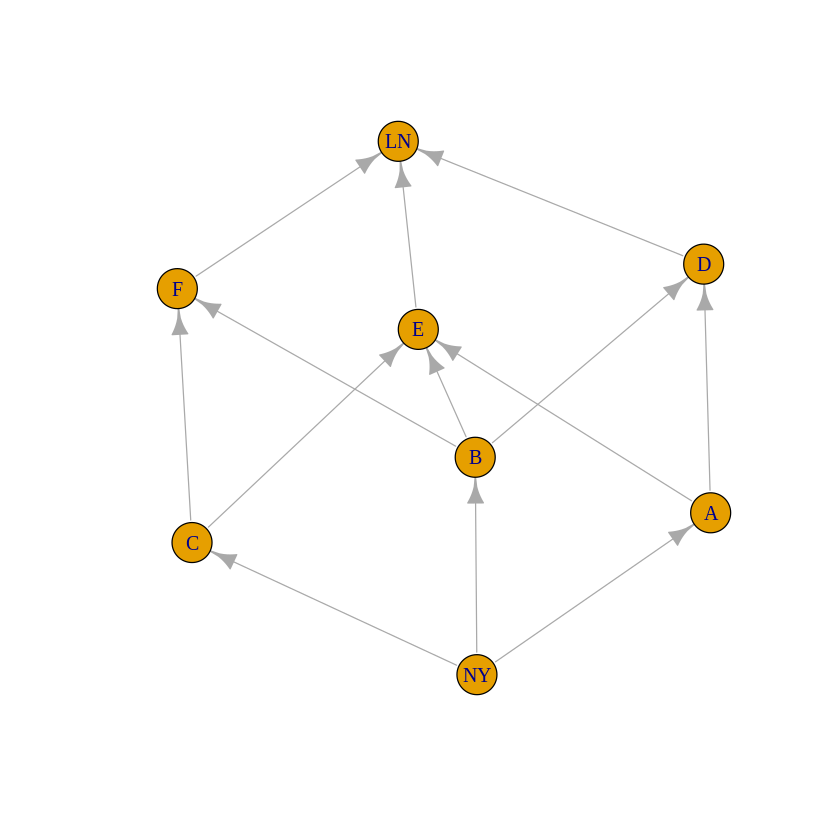

In [9]:
E = rbind(c("NY", "A", 5), 
          c("NY", "B", 4.5), 
          c("NY", "C", 4.3), 
          c("A", "D", 4.2),
          c("A", "E", 3.5),
          c("B", "D", 3.6),
          c("B", "E", 3.3),
          c("B", "F", 3.5), 
          c("C", "E", 3.6), 
          c("C", "F", 4),
          c("D", "LN", 4),
          c("E", "LN", 7),
          c("F", "LN", 6))

colnames(E) = c("from", "to", "weight") 
rede = data.frame(E)
rede

g = graph_from_data_frame(rede)
plot(g)

resultados = get.shortest.paths(g, from = V(g)["NY"], to = V(g)["LN"])
resultados$vpath

distances(g, v = V(g)["NY"], to = V(g)["LN"])


O caminho mais rápido para chegar de NY até LN é: NY >>> B >>> D >>> LN, e a viagem demorará 12.1 horas.